# Analyzing and classifying bear images <br>
Run the code and this model will download images of three types of bears: black, grizzly, and teddy.<br>
The model will then classify the images accordingly.

In [1]:
!pip install -U fastbook
!pip install numpy==1.22.0
!pip install --upgrade scipy

import fastbook
fastbook.setup_book()
#hide
from fastbook import *
from fastai.vision.widgets import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 11.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 37.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.6.1 requires cupy-cuda11x>=12.0.0, which is not installed.
cuml 23.6.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.6.1 requires cupy-cuda11x>=12.0.0, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 11.0.0 which is incompatible.
chex 0.1.81 requires numpy>=1.25.0, but you have numpy 1.22.0 which is incompatible.
cu

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
bear_types = 'grizzly','black','teddy' # define types of bear that we'd like to download the images
path = Path('bears')

if not path.exists():
  path.mkdir()  # create a directory to save downloaded images
  for o in bear_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    urls = search_images_ddg(f' {o} bear') # search images through DuckDuckGo
    download_images(dest, urls=urls) # download all the URLs for each of our search terms. We'll put each in a separate folder

fns = get_image_files(path) # 
fns

failed = verify_images(fns)
failed
failed.map(Path.unlink);
     


In [3]:
bears = DataBlock(
    # provide a tuple where we specify what types we want for the independent and dependent variables:
    blocks=(ImageBlock, CategoryBlock), # What kinds of data we are working with
    get_items=get_image_files, # How to get the list of items
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # How to create the validation set
    get_y=parent_label, # How to label these items, gets the name of the folder a file is in
    item_tfms=Resize(128)) # Transformation: picture resize

## Training Set

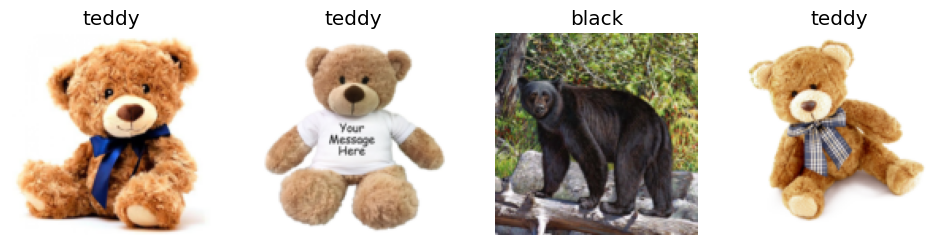

In [4]:
dls = bears.dataloaders(path) # the path where the images can be found
dls.train.show_batch(max_n=4, nrows=1) # check training set

## Validation Set

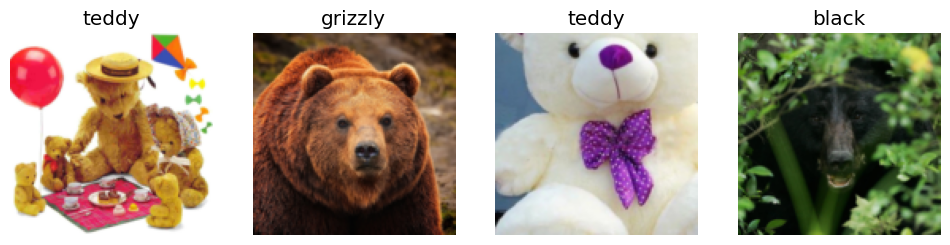

In [5]:
dls.valid.show_batch(max_n=4, nrows=1) # check validation set

## Check Data

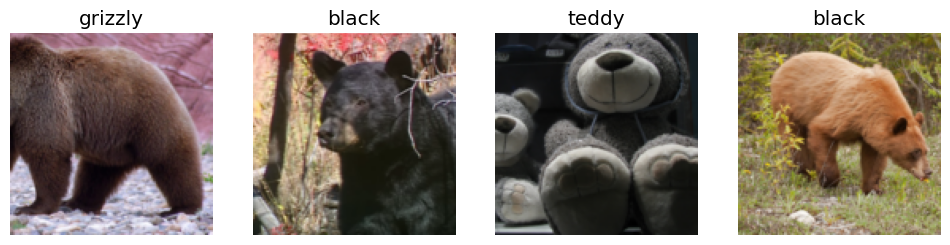

In [6]:
dls.show_batch(max_n=4, nrows=1) # check data